In [1]:
!pip install imbalanced-learn==0.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
# Importing Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing Libs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Modelling Libs
from sklearn.tree import DecisionTreeClassifier

# Validating/Testing libs
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score

# Step-1. Load and Inspect Data

In [3]:
file_path = "/kaggle/input/credit-card-fraud-dataset/Dataset-1.csv"

# Read the dataset 
credit_df = pd.read_csv(file_path)

# Display dataset
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Printing first ten rows
credit_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# inspecting the data types of the attributes
credit_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# Some Information
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# descriptive statistics
credit_df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Step-2. Data Cleaning

In [8]:
# Handling missing values.
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Inference : No missing values in the data set

In [9]:
# Handling duplicate Values

# finding if any duplicates
print(credit_df.duplicated().value_counts())

# Analysing duplicates
duplicate_rows = credit_df[credit_df.duplicated(keep=False)]
duplicate_rows


False    283726
True       1081
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [10]:
# drop the duplicates
credit_df.drop_duplicates(inplace=True)

# verifying
credit_df.duplicated().sum()

0

In [11]:
# Dealing Outliers

#  No need of working outliers because the V1-V28 are already transformed.

In [12]:
# Since V1-V28 all the columns are already transformed and are numerical columns, no need to work on conversion step

# Step-3. Exploratory Data Analysis (EDA)

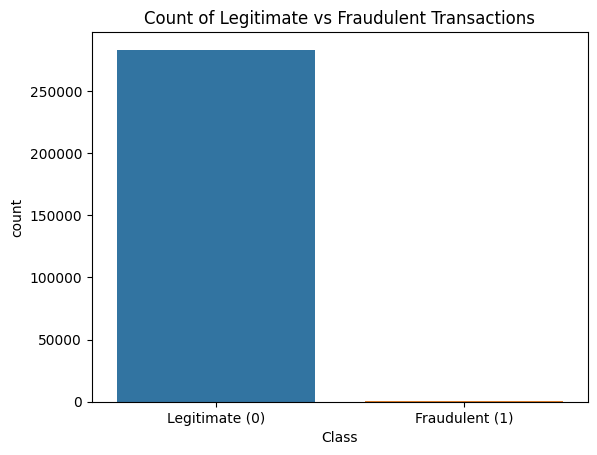

In [13]:
# Count Plot of Fraudulent vs Non-Fraudulent Transactions

sns.countplot(x='Class', data=credit_df)
plt.title('Count of Legitimate vs Fraudulent Transactions')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.show()

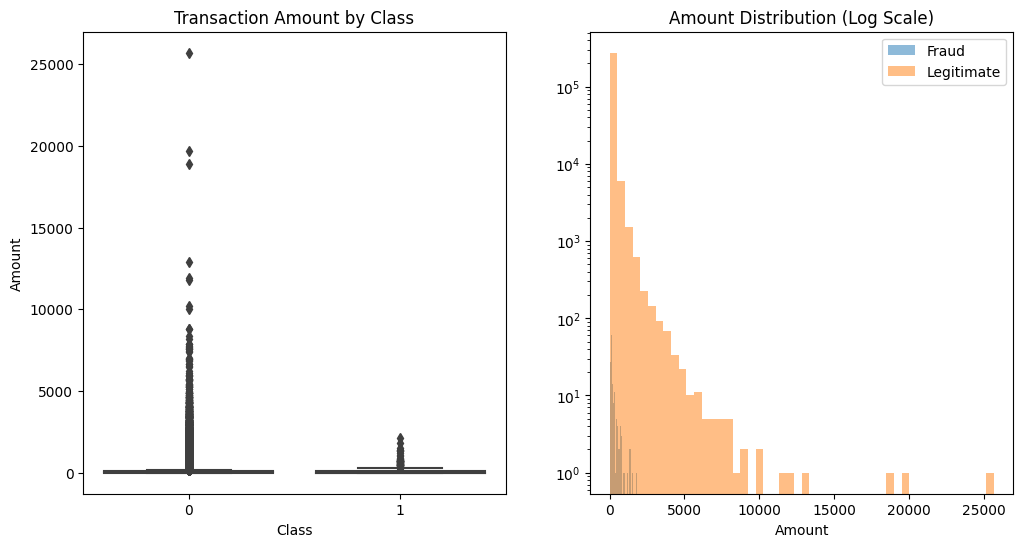

In [14]:
#Transcation Analysis.


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amount by Class')


plt.subplot(1, 2, 2)
fraud_amounts = credit_df[credit_df['Class'] == 1]['Amount']
legit_amounts = credit_df[credit_df['Class'] == 0]['Amount']
plt.hist(fraud_amounts, bins=50, alpha=0.5, label='Fraud')
plt.hist(legit_amounts, bins=50, alpha=0.5, label='Legitimate')
plt.xlabel('Amount')
plt.yscale('log')
plt.title('Amount Distribution (Log Scale)')
plt.legend()
plt.show()


**Inference:**

      * From box plot visualization , we can observe the fraud transactions are mostly of smaller amounts.
      
      * From Log scale plot- Handling class Imbalances

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


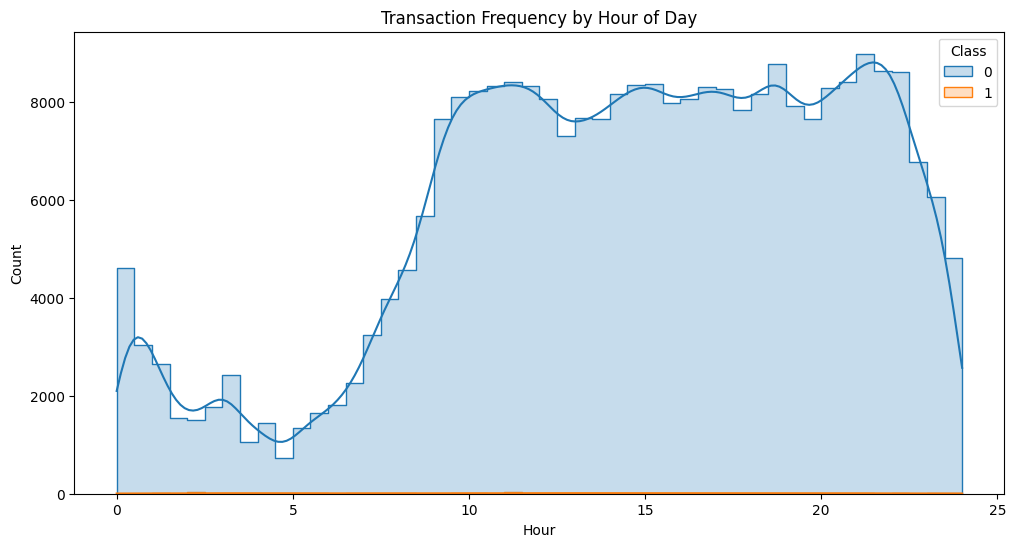

In [15]:
# Time Distribution of transactions

plt.figure(figsize=(12, 6))
credit_df['Hour'] = credit_df['Time'] / 3600 % 24
sns.histplot(data=credit_df, x='Hour', hue='Class', bins=48, kde=True, element='step')
plt.title('Transaction Frequency by Hour of Day')
plt.show()

**Inference**

we can infer from above graph that fraud transaction occurs more uniformly throughout the day compared to legimate transactions.

The orange line appears almost flat and uniform, with no strong time-of-day preference.

This indicates that fraudulent transactions occur more evenly across all hours of the day implies Fraudsters try to operate around the clock, possibly using bots or automated systems.



In [16]:
# correlation matrix
correlation_matrix = credit_df.corr()
print(correlation_matrix)


            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


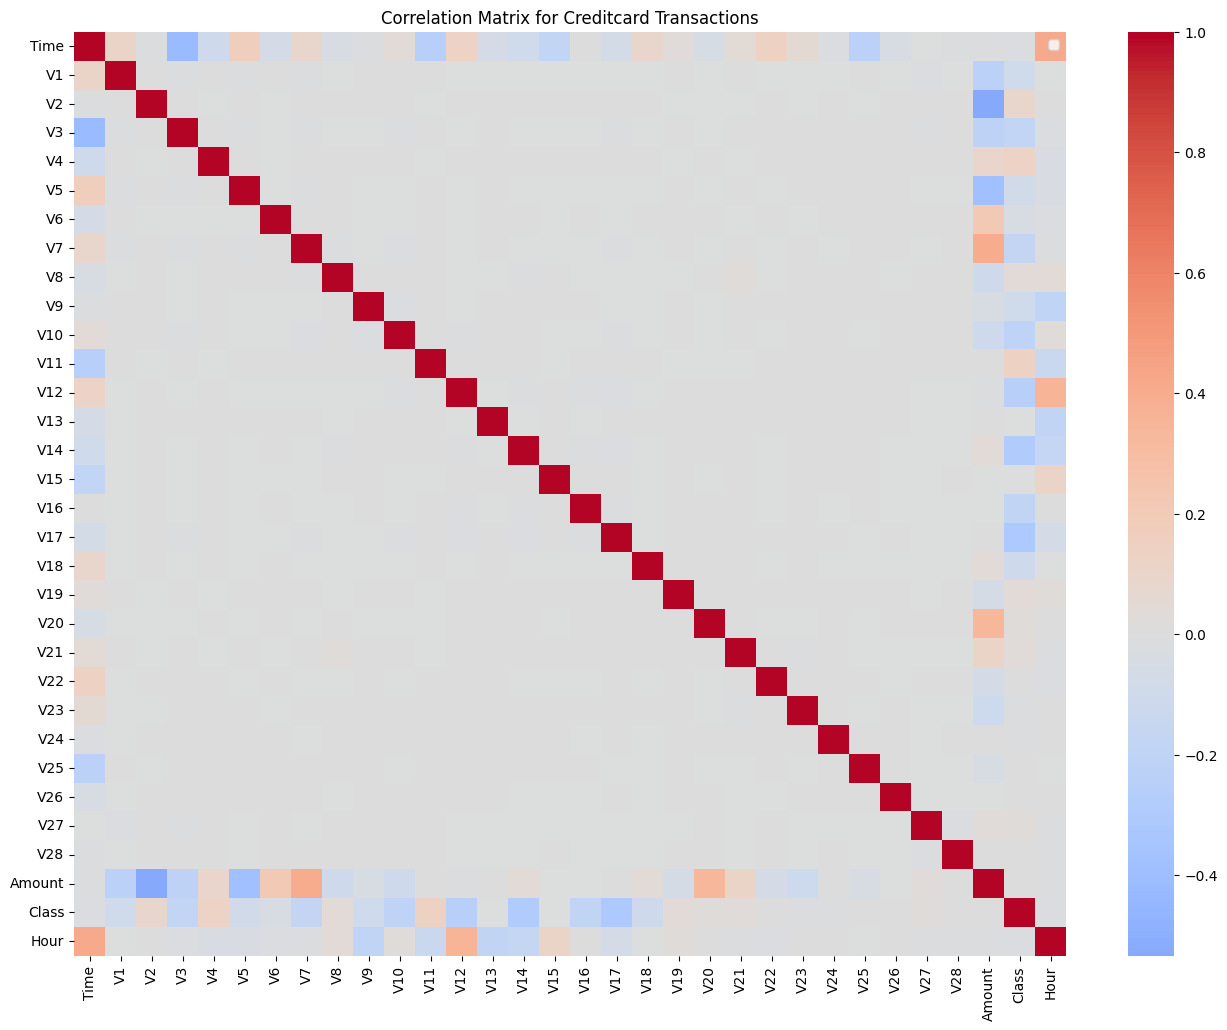

In [17]:
# heat map for our correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,annot=False,center=0, cmap='coolwarm')
plt.title("Correlation Matrix for Creditcard Transactions")
plt.legend()
plt.show()

In [18]:
# Get correlations with 'Class' and sort
class_corr = correlation_matrix['Class'].sort_values(ascending=False)

# Strong Positive Correlations (r > 0.1)
print("Strong Positive Correlations with Fraud:")
print(class_corr[class_corr > 0.1])

# Strong Negative Correlations (r < -0.1)
print("\nStrong Negative Correlations with Fraud:")
print(class_corr[class_corr < -0.1])

Strong Positive Correlations with Fraud:
Class    1.000000
V11      0.149067
V4       0.129326
Name: Class, dtype: float64

Strong Negative Correlations with Fraud:
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


**Inference**

     Negative Correlation → Feature inhibits fraud (higher value = safer transaction).
         ->V17,V14,V12 - strong negative correlation with fraud.
         
     Positive Correlation → Feature promotes fraud (higher value = riskier transaction).
          -->V11, V4, V2, - strong positive correlation
    


In [19]:
# Scaling - Time and Amount features

scaler = StandardScaler()
credit_df['Amount_scaled'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))
credit_df['Time_scaled'] = scaler.fit_transform(credit_df['Time'].values.reshape(-1, 1))
credit_df.drop(['Time', 'Amount'], axis=1, inplace=True)


# Split the dataset

In [20]:
# Split Data into Train/Test Sets (80:20)
X = credit_df.drop('Class', axis=1)
Y = credit_df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


# Handling Class Imbalance - Using SMOTE

      --> why we need to? - In my dataset, only 0.17% of transactions are fraudulent (492 frauds vs. 284,315 legitimate).
      
      --> Model can be Bias Toward the Majority Class
      
      --> A naive model could achieve 99.8% accuracy by always predicting "not fraud," but it would catch 0% of actual fraud


In [21]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print(f"Class distribution after SMOTE: \n{Y_train_smote.value_counts()}")


Class distribution after SMOTE: 
Class
0    226602
1    226602
Name: count, dtype: int64


# Model Implementation - Decision Trees

In [22]:
# Initialize Decision Tree (with class_weight to handle imbalance)
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train on balanced(smoted) data
dt.fit(X_train_smote, Y_train_smote)

# Make predictions
y_pred = dt.predict(X_test)

# Probability estimates
y_prob = dt.predict_proba(X_test)[:, 1]  

# Model Performance using various metrics

In [23]:
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nROC AUC Score: {:.4f}".format(roc_auc_score(Y_test, y_prob)))
print(f"Precision: {precision_score(Y_test,y_pred)*100:.2f}%")
print(f"Accuracy: {accuracy_score(Y_test,y_pred) * 100:.2f}%")
print(f"Recall: {recall_score(Y_test,y_pred)*100:.2f}%")
print(f"F1_Score: {f1_score(Y_test,y_pred)*100:.2f}%")

# print sizes.
print(X_train.shape)
print(X_test.shape)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.36      0.69      0.48        95

    accuracy                           1.00     56746
   macro avg       0.68      0.85      0.74     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix:
 [[56536   115]
 [   29    66]]

ROC AUC Score: 0.8464
Precision: 36.46%
Accuracy: 99.75%
Recall: 69.47%
F1_Score: 47.83%
(226980, 31)
(56746, 31)


**Inference:**

      --> Accuracy - 99.75% 

      --> Decent recall on fraud class (important for fraud detection).

      --> AUC of ~0.85 is strong.

**Weakness**

      --> F1-score of 47.83% for fraud is still moderate — indicates room for improvement.

      --> Model might be too conservative — better at catching fraud, but sacrifices precision.


# Evaluation with Confusion Matrix

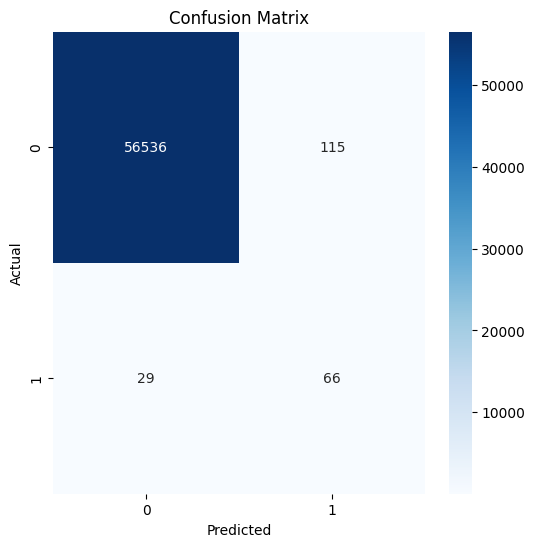

In [24]:
# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Inference:**

      --> True Positives (TP): 66 (correctly predicted "1").
      --> False Positives (FP): 29 (incorrectly predicted "1" when actual was "0").
      --> True Negatives (TN): 56,536 (correctly predicted "0").
      --> False Negatives (FN): 115 (incorrectly predicted "0" when actual was "1").


# Final Evaluation:

# --> Even though after implemetation of SMOTE, we can observe still a decent amount of False positives are being Flagged this might be due to overfitting which was caused by noisy samples created by smote.

# --> Imbalanced class distribution still exists during model evaluation, even though training data is balanced.

# --> We can try to Combine SMOTE with Undersampling techniques (SMOTE+ENN) for betterness.

# --> May be we can try another detection models like Random Forest or Isolation Forest.
